# Loading Libraries

In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Loading Dataset

In [2]:
#Load data for train.csv
train = pd.read_csv('train_normalized.csv')

In [3]:
train.head()

,Country,Year,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Afghanistan,2007,102.3,0.891868,5.294118,1.082288,5.784924,0.990978,6.811815,0.516645,0.012523,3.727206,1.742698,1.392047
1,Albania,2007,70.5,1.083986,7.647059,2.604912,9.177459,3.968864,7.862571,1.868172,0.023873,4.671575,5.334303,1.729344
2,Algeria,2007,75.9,0.787625,0.000000,2.420803,5.220100,4.598225,4.508491,0.813149,0.080255,2.669509,0.000000,1.460053
3,Angola,2007,84.9,0.568128,5.882353,2.344786,6.007315,4.272841,10.000000,5.574090,0.207461,3.513908,0.019284,2.172513
4,Antigua and Barbuda,2007,65.7,0.219890,0.000000,1.722829,5.470378,0.000000,2.212915,0.000000,0.000089,4.784400,0.000000,2.742688


In [4]:
train.shape

(1775, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 14 columns):
Country              1775 non-null object
Year                 1775 non-null int64
Fsi Score            1775 non-null float64
Debt                 1775 non-null float64
Environment          1775 non-null float64
Financial Sector     1775 non-null float64
Health               1775 non-null float64
Infrastructure       1775 non-null float64
Labour               1775 non-null float64
Poverty              1775 non-null float64
Private Sector       1775 non-null float64
Public Sector        1775 non-null float64
Social Protection    1775 non-null float64
Trade                1775 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 194.2+ KB


# Data Visualization

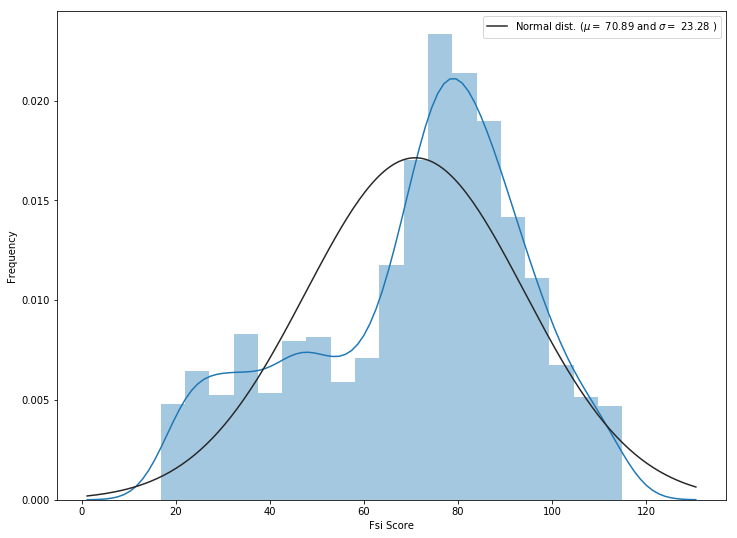

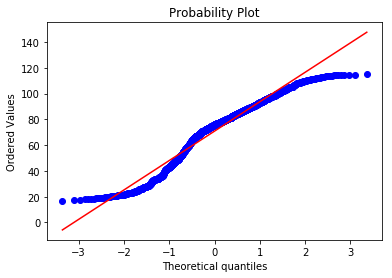

In [6]:
temp=train
#Some analysis on target variable
plt.subplots(figsize=(12,9))
sns.distplot(temp['Fsi Score'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(temp['Fsi Score'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(temp['Fsi Score'], plot=plt)
plt.show()

In [7]:
temp.head()

,Country,Year,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Afghanistan,2007,102.3,0.891868,5.294118,1.082288,5.784924,0.990978,6.811815,0.516645,0.012523,3.727206,1.742698,1.392047
1,Albania,2007,70.5,1.083986,7.647059,2.604912,9.177459,3.968864,7.862571,1.868172,0.023873,4.671575,5.334303,1.729344
2,Algeria,2007,75.9,0.787625,0.000000,2.420803,5.220100,4.598225,4.508491,0.813149,0.080255,2.669509,0.000000,1.460053
3,Angola,2007,84.9,0.568128,5.882353,2.344786,6.007315,4.272841,10.000000,5.574090,0.207461,3.513908,0.019284,2.172513
4,Antigua and Barbuda,2007,65.7,0.219890,0.000000,1.722829,5.470378,0.000000,2.212915,0.000000,0.000089,4.784400,0.000000,2.742688


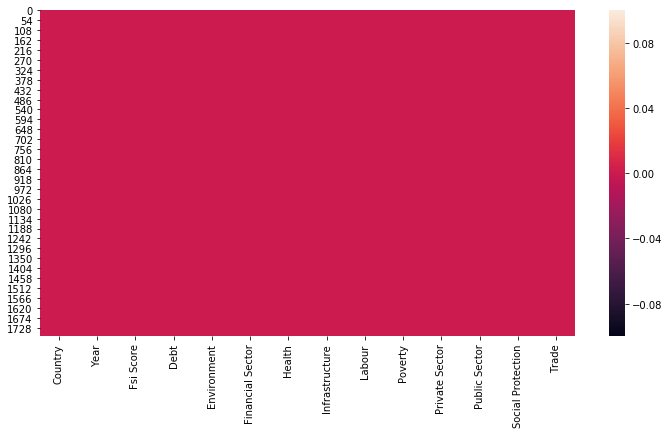

In [8]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(temp.isnull())
plt.show()

In [9]:
#missing value counts in each of these columns
Isnull = temp.isnull().sum()/len(temp)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Series([], dtype: float64)

In [10]:
#Corralation between train attributes
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 13 numerical attribute from 14 attributes
temp_corr = temp.select_dtypes(include=[np.number])

In [11]:
temp_corr.shape

(1775, 13)

In [12]:
#Delete Year because that is not need for corralation plot
del temp_corr['Year']

In [13]:
temp_corr.head()

,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,102.3,0.891868,5.294118,1.082288,5.784924,0.990978,6.811815,0.516645,0.012523,3.727206,1.742698,1.392047
1,70.5,1.083986,7.647059,2.604912,9.177459,3.968864,7.862571,1.868172,0.023873,4.671575,5.334303,1.729344
2,75.9,0.787625,0.000000,2.420803,5.220100,4.598225,4.508491,0.813149,0.080255,2.669509,0.000000,1.460053
3,84.9,0.568128,5.882353,2.344786,6.007315,4.272841,10.000000,5.574090,0.207461,3.513908,0.019284,2.172513
4,65.7,0.219890,0.000000,1.722829,5.470378,0.000000,2.212915,0.000000,0.000089,4.784400,0.000000,2.742688


In [14]:
def normalize(df):
    result = df.copy()
    max_value = df['Fsi Score'].max()
    min_value = df['Fsi Score'].min()
    result['Fsi Score'] = ((df['Fsi Score'] - min_value) / (max_value - min_value))*10
    return result

temp_corr=normalize(temp_corr)
temp_corr

,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,8.715596,0.891868,5.294118,1.082288,5.784924,0.990978,6.811815,0.516645,1.252278e-02,3.727206,1.742698,1.392047
1,5.474006,1.083986,7.647059,2.604912,9.177459,3.968864,7.862571,1.868172,2.387251e-02,4.671575,5.334303,1.729344
2,6.024465,0.787625,0.000000,2.420803,5.220100,4.598225,4.508491,0.813149,8.025544e-02,2.669509,0.000000,1.460053
3,6.941896,0.568128,5.882353,2.344786,6.007315,4.272841,10.000000,5.574090,2.074609e-01,3.513908,0.019284,2.172513
4,4.984709,0.219890,0.000000,1.722829,5.470378,0.000000,2.212915,0.000000,8.862336e-05,4.784400,0.000000,2.742688
5,2.507645,0.321772,0.000000,2.329844,6.093311,5.411506,8.135235,1.185226,1.129503e+00,3.643959,4.080693,0.996065
6,5.453619,0.927894,8.823529,2.005391,9.392095,4.138297,7.200396,2.944324,3.528029e-02,4.448807,6.117213,1.271382
7,0.652396,0.061927,0.000000,7.763772,5.552854,7.837473,8.425575,0.060792,2.744982e-02,6.569313,0.000000,2.483953
8,0.937819,0.000000,0.000000,6.767060,5.548779,8.135579,7.500213,0.037024,1.186817e-02,5.712987,0.285569,2.400852
9,6.564730,0.698627,7.647059,2.183267,7.340565,5.776290,5.657799,2.048238,3.133317e-02,4.100866,9.987614,1.951024


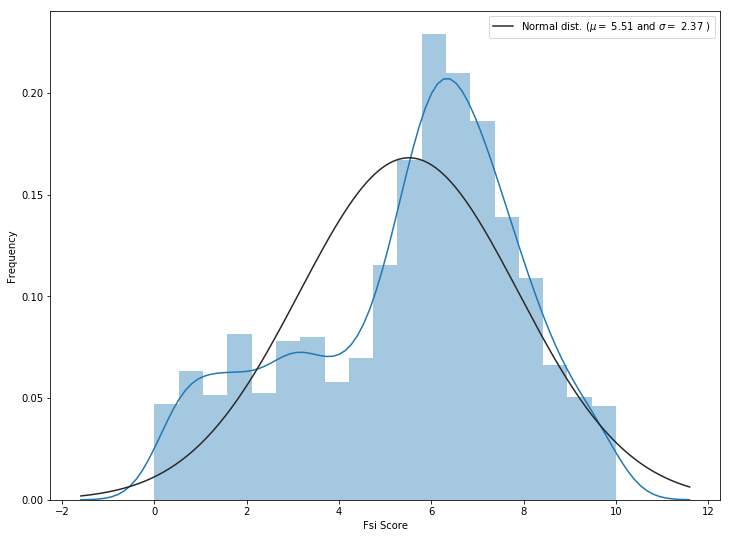

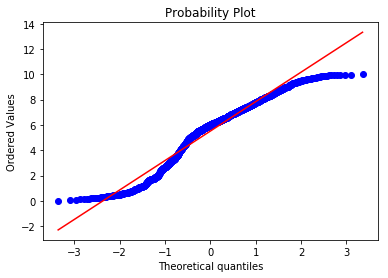

In [15]:
#Some analysis on target variable
plt.subplots(figsize=(12,9))
sns.distplot(temp_corr['Fsi Score'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(temp_corr['Fsi Score'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(temp_corr['Fsi Score'], plot=plt)
plt.show()

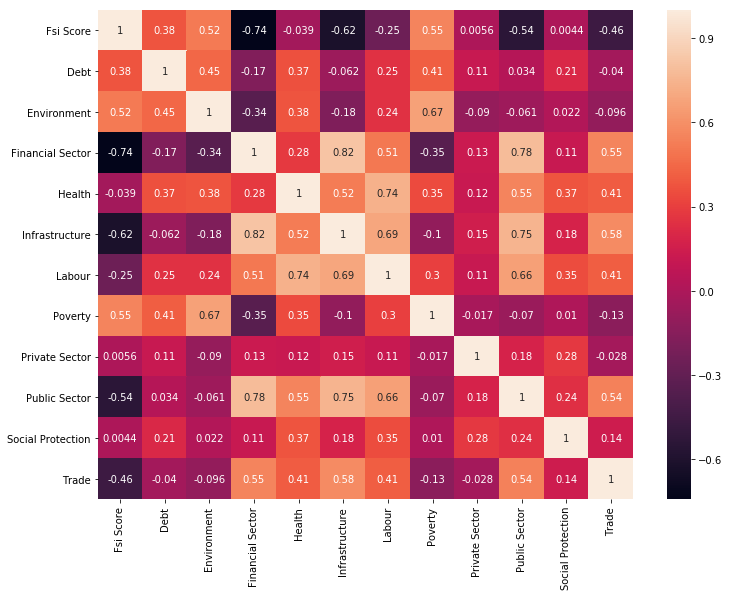

In [16]:
#Coralation plot
corr = temp_corr.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)

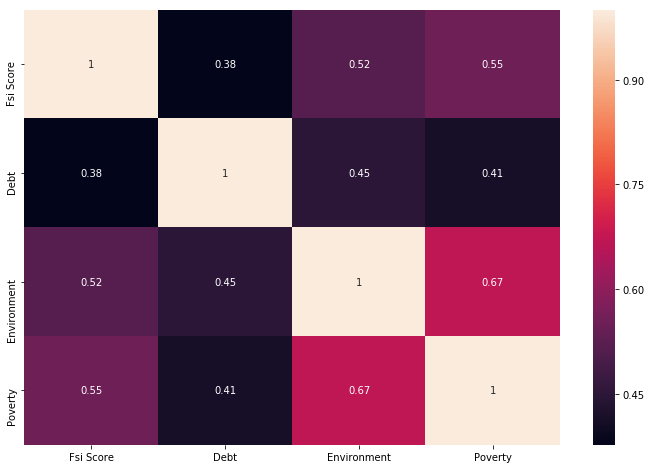

In [17]:
#Top 50% Corralation train attributes with sale-price
top_feature = corr.index[abs(corr['Fsi Score']>0.3)]
plt.subplots(figsize=(12, 8))
#top_corr = train[top_feature].corr()
top_corr = temp_corr[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

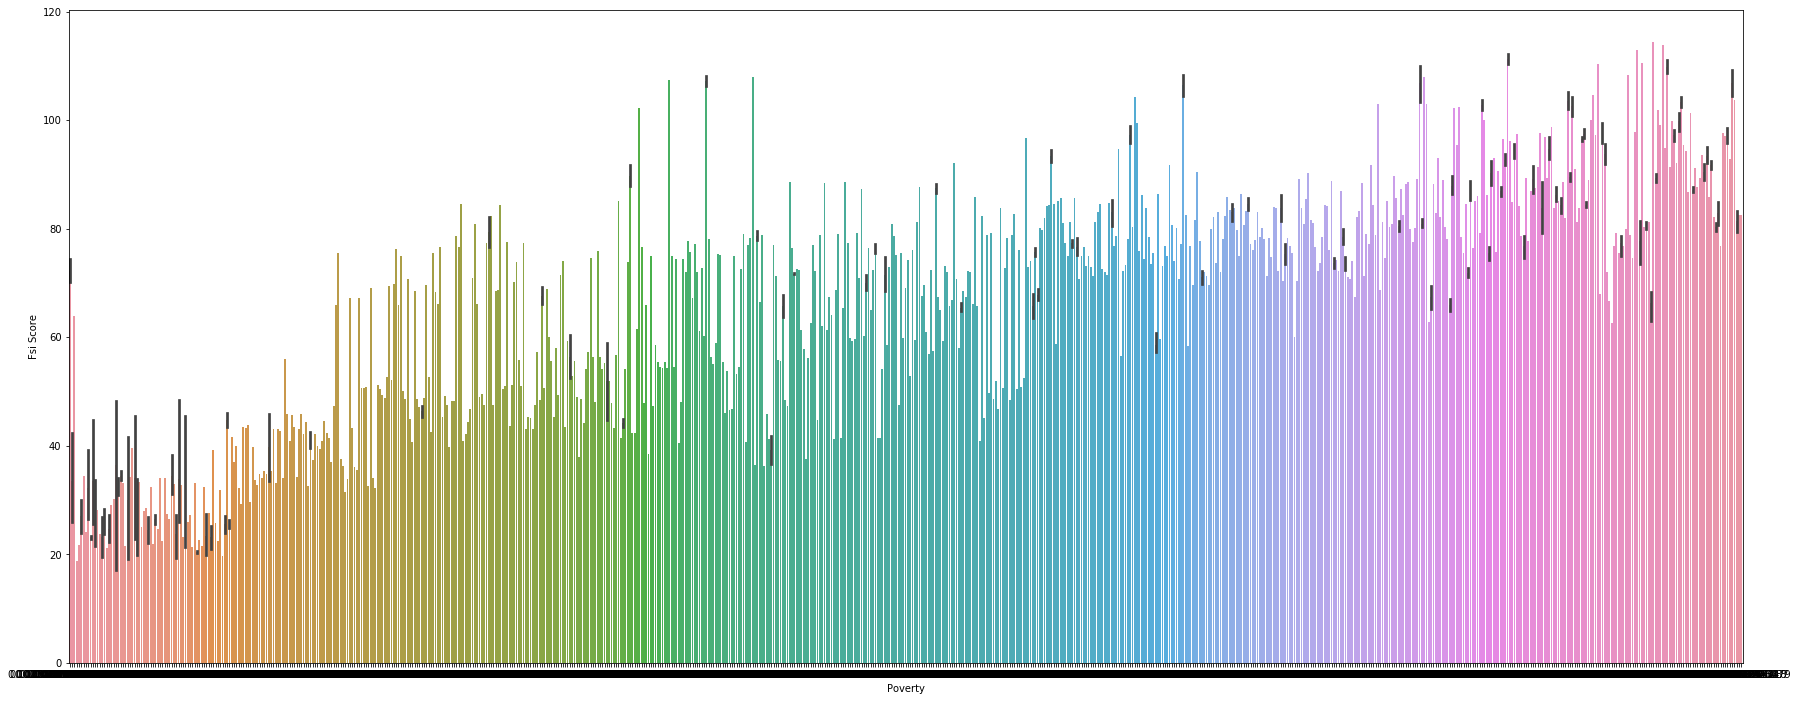

In [18]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(train['Poverty'], train['Fsi Score'])

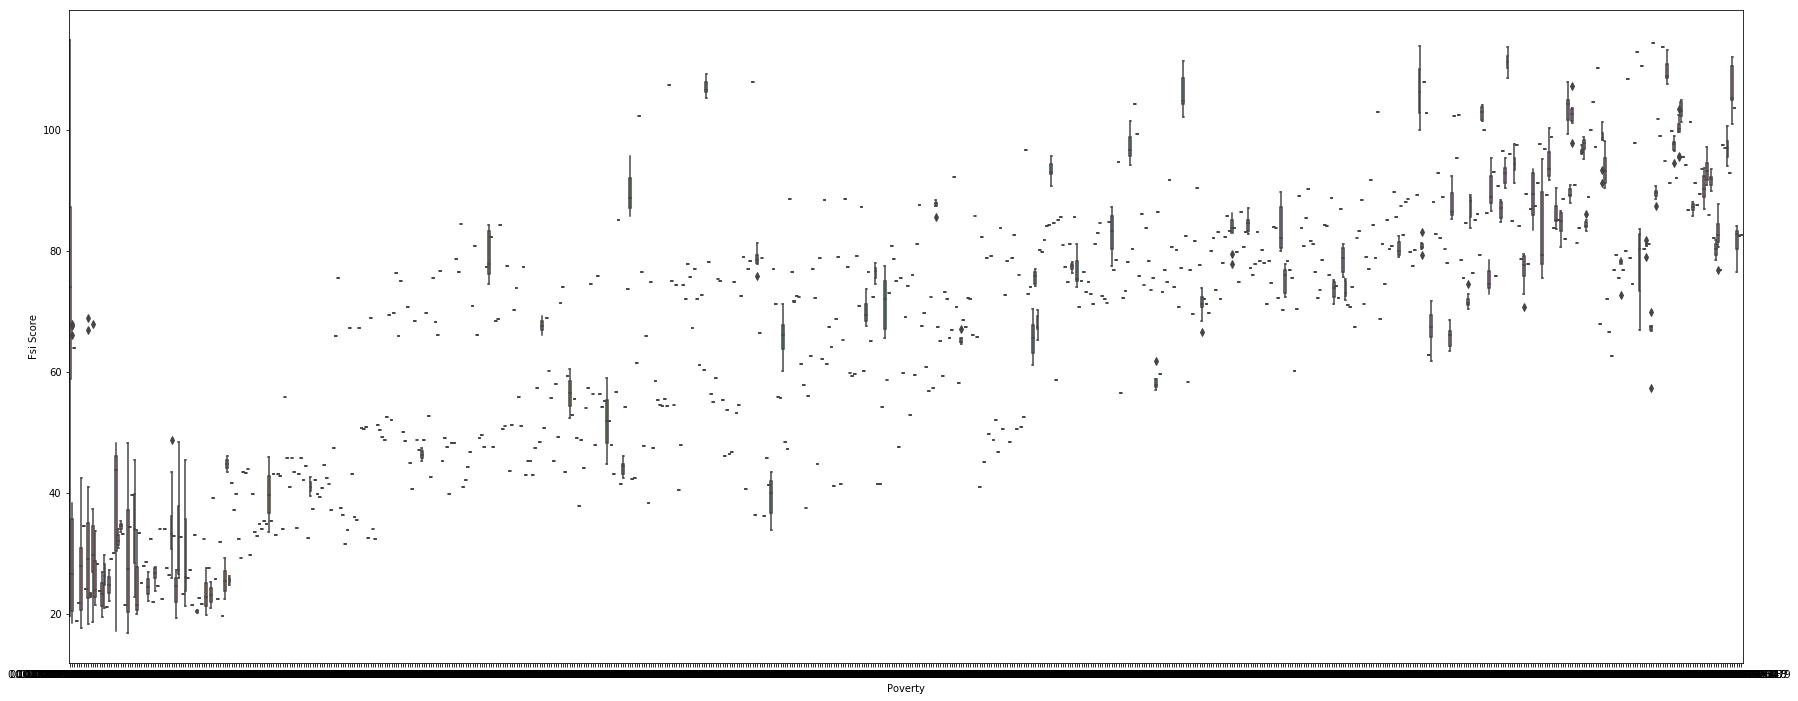

In [19]:
#boxplot
plt.figure(figsize=(30, 12))
sns.boxplot(x=train['Poverty'], y=train['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

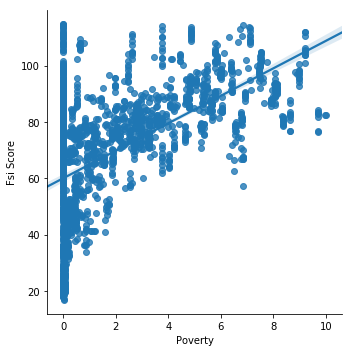

In [20]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Poverty', y='Fsi Score',data=train)

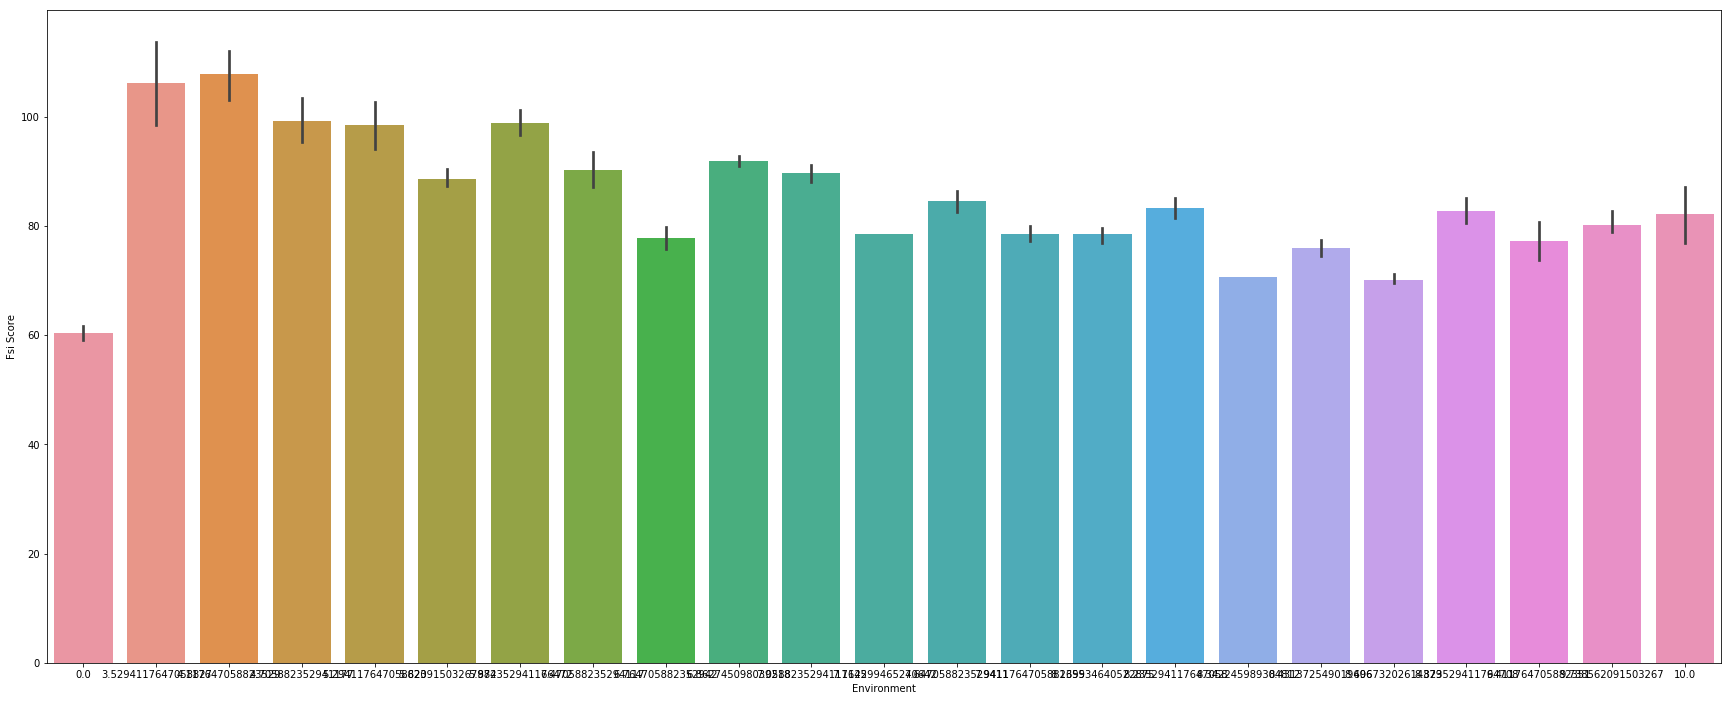

In [21]:
plt.figure(figsize=(30, 12))
sns.barplot(train['Environment'], train['Fsi Score'])

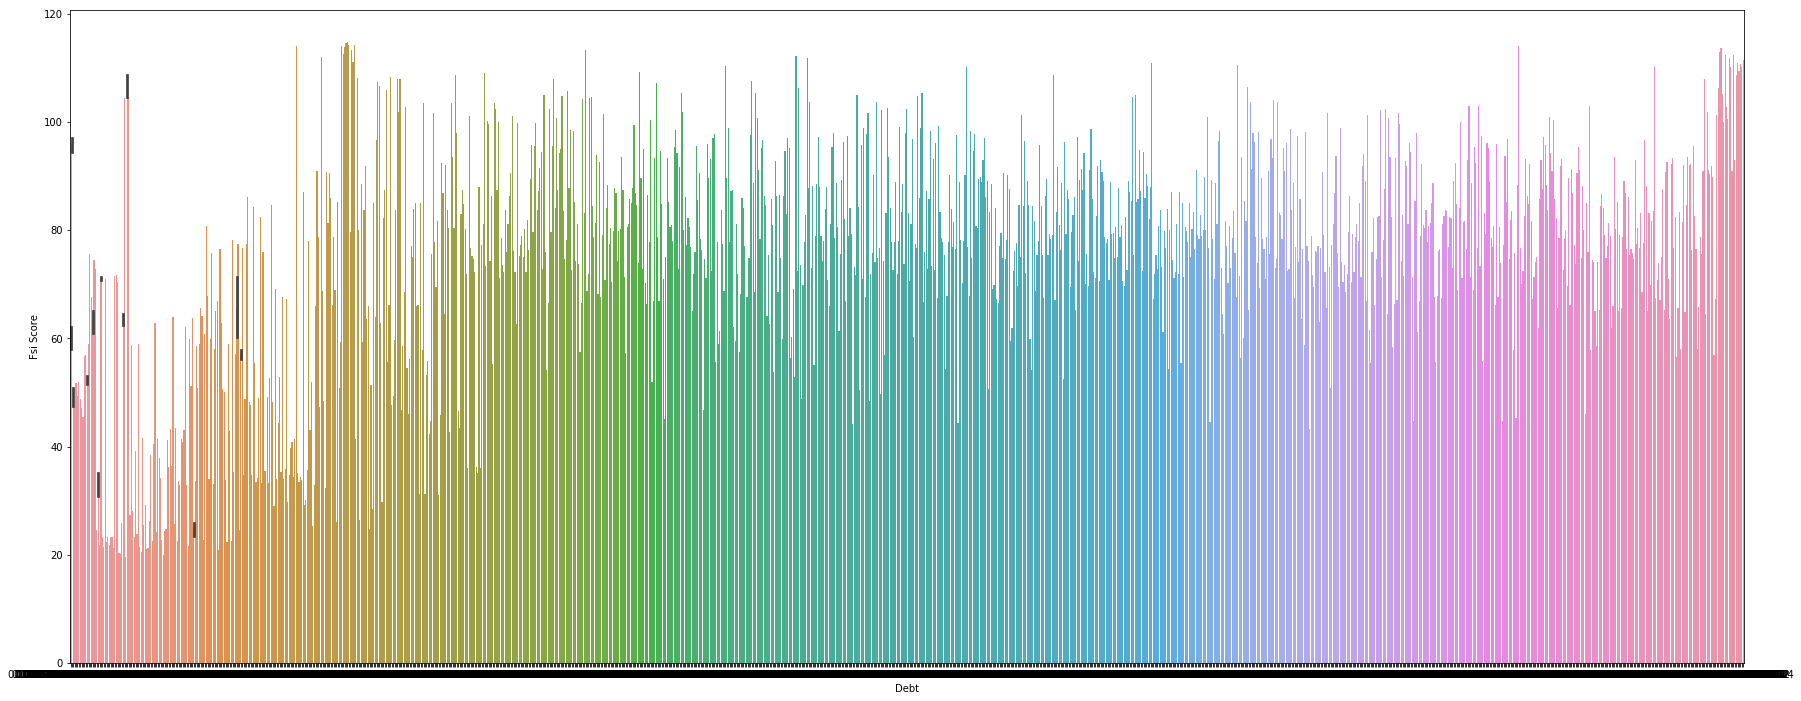

In [22]:
plt.figure(figsize=(30, 12))
sns.barplot(train['Debt'], train['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

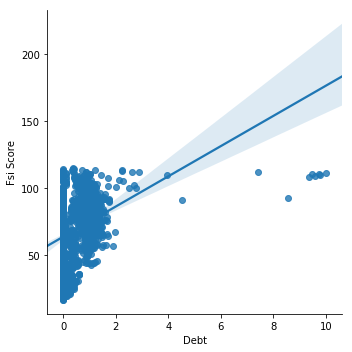

In [23]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Debt', y='Fsi Score',data=train)

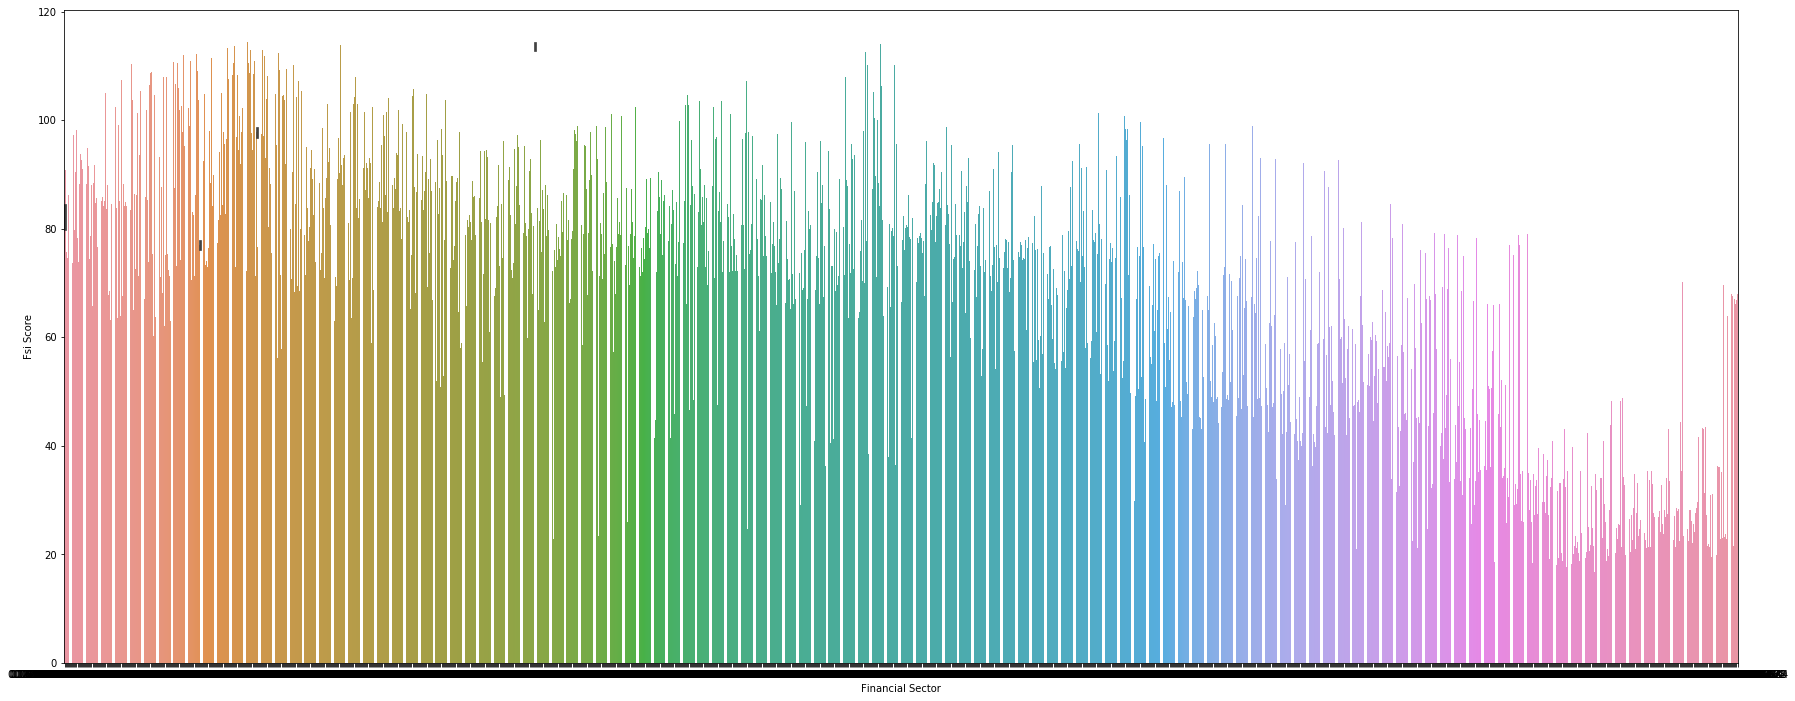

In [24]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(x=train['Financial Sector'], y=train['Fsi Score'])

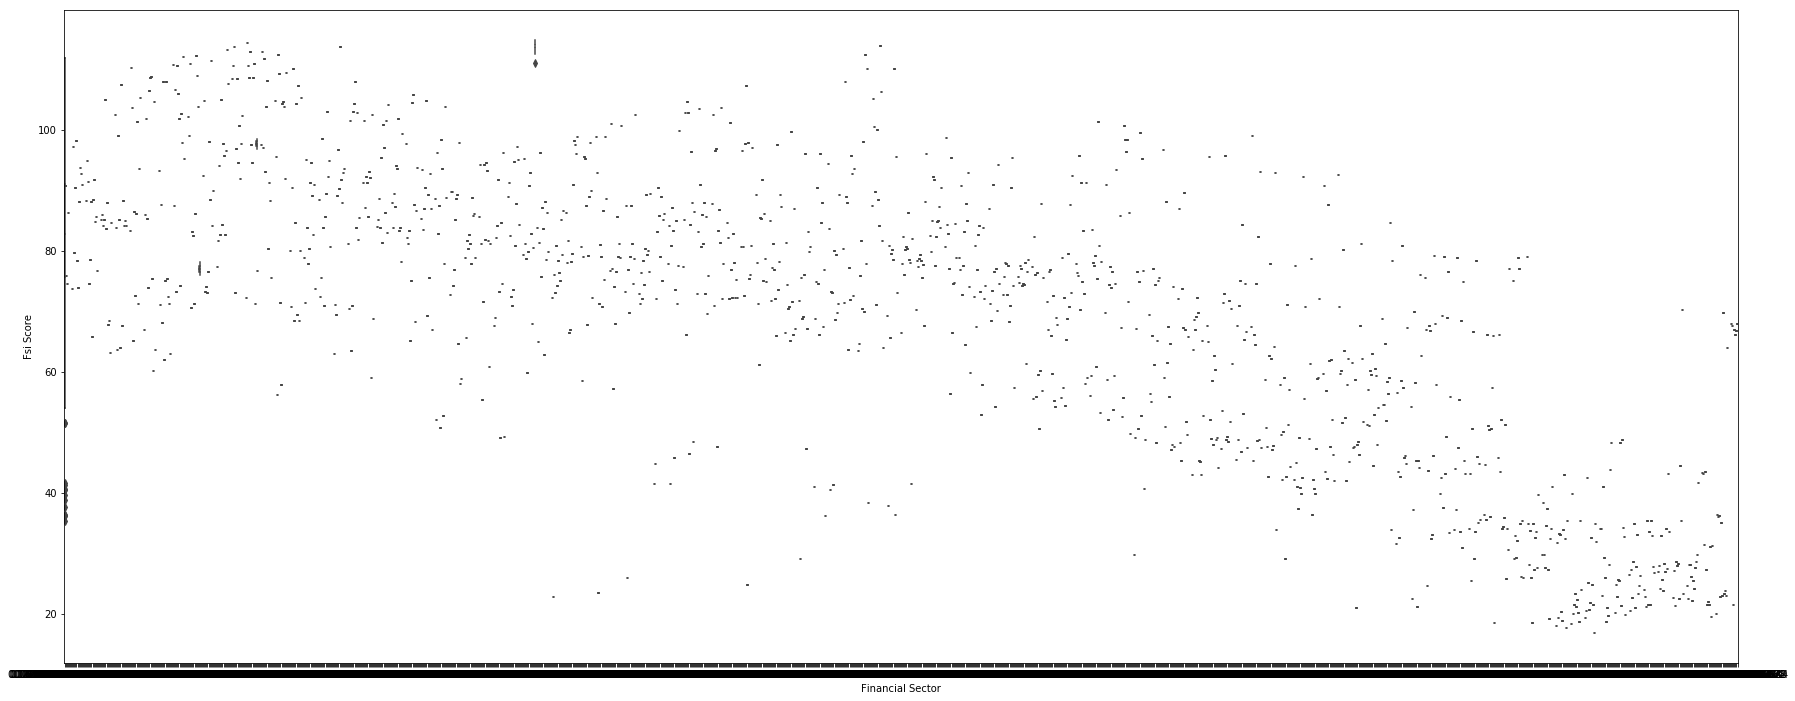

In [25]:
#boxplot
plt.figure(figsize=(30, 12))
sns.boxplot(x=train['Financial Sector'], y=train['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

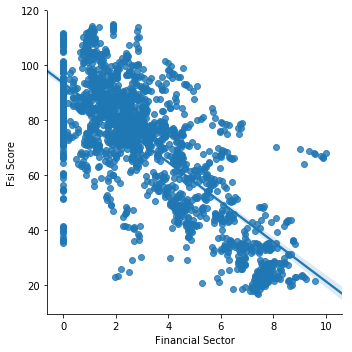

In [26]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Financial Sector', y='Fsi Score',data=train)

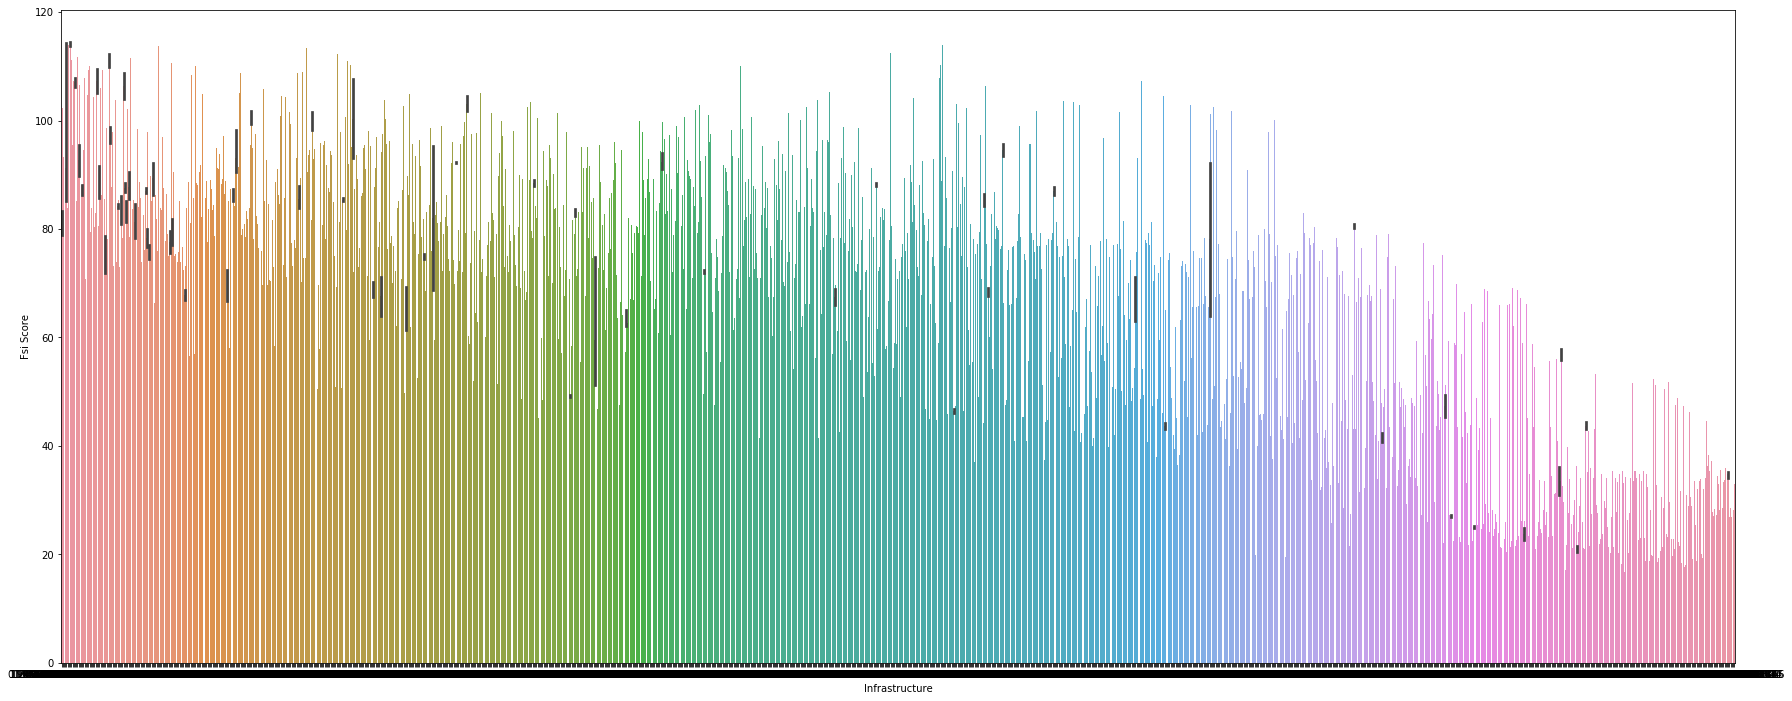

In [27]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(x=train['Infrastructure'], y=train['Fsi Score'])

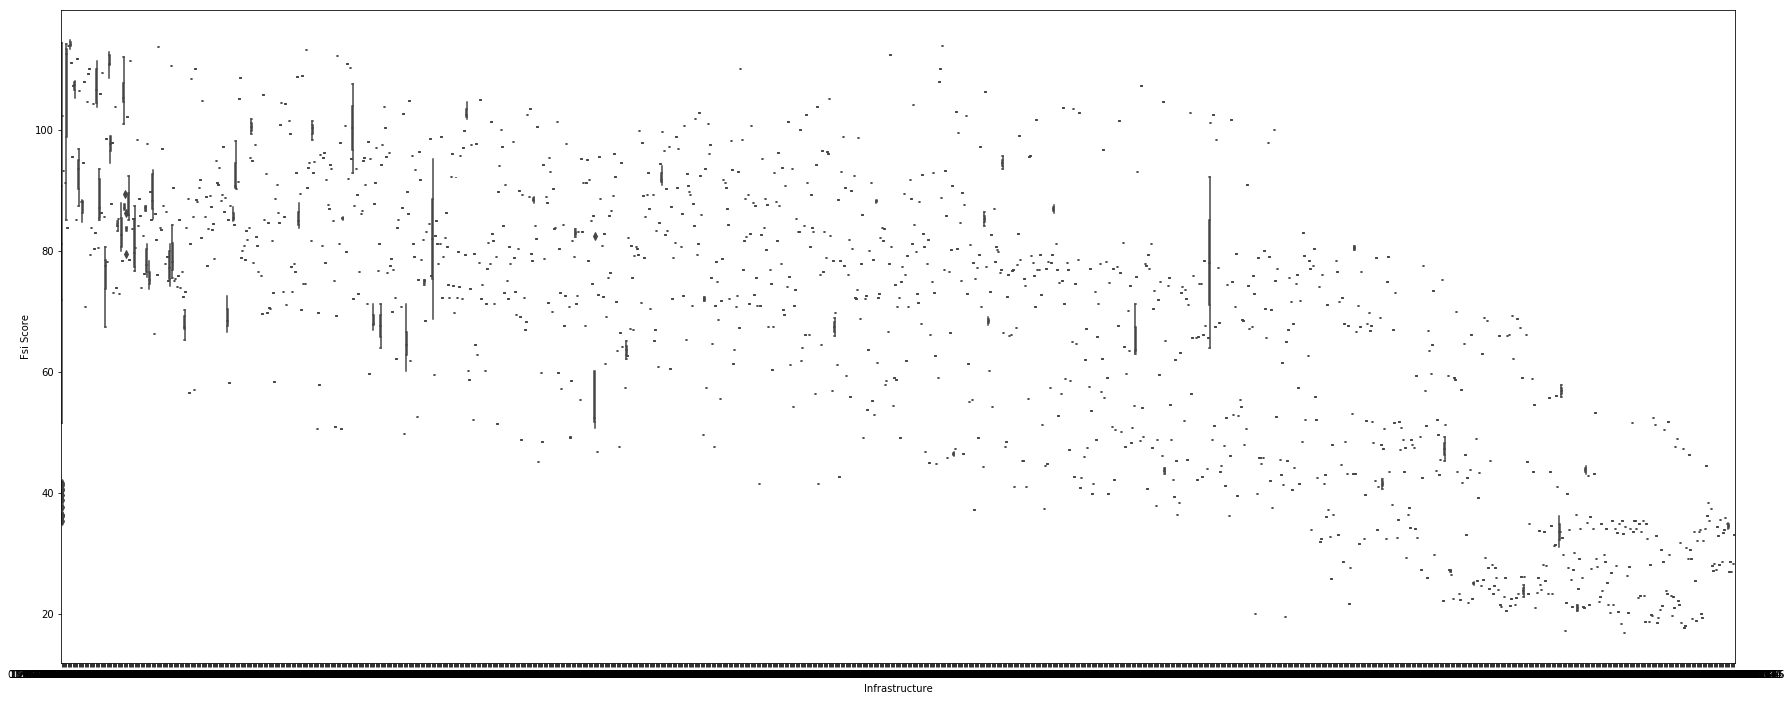

In [28]:
#boxplot
plt.figure(figsize=(30, 12))
sns.boxplot(x=train['Infrastructure'], y=train['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

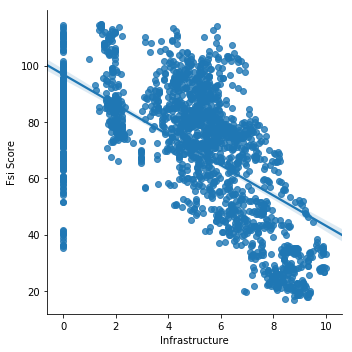

In [29]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Infrastructure', y='Fsi Score',data=train)

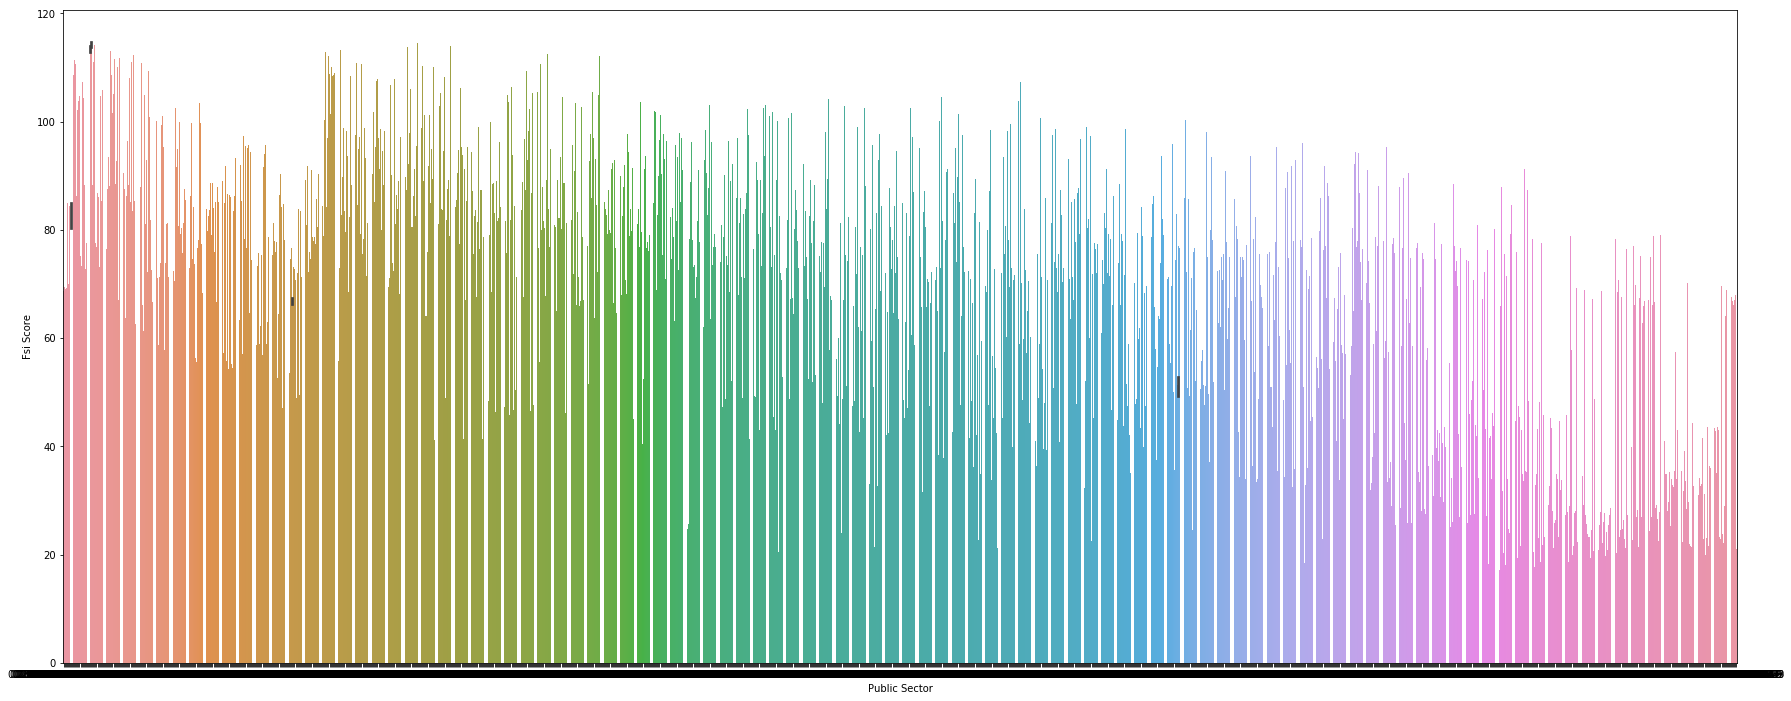

In [30]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(x=train['Public Sector'], y=train['Fsi Score'])

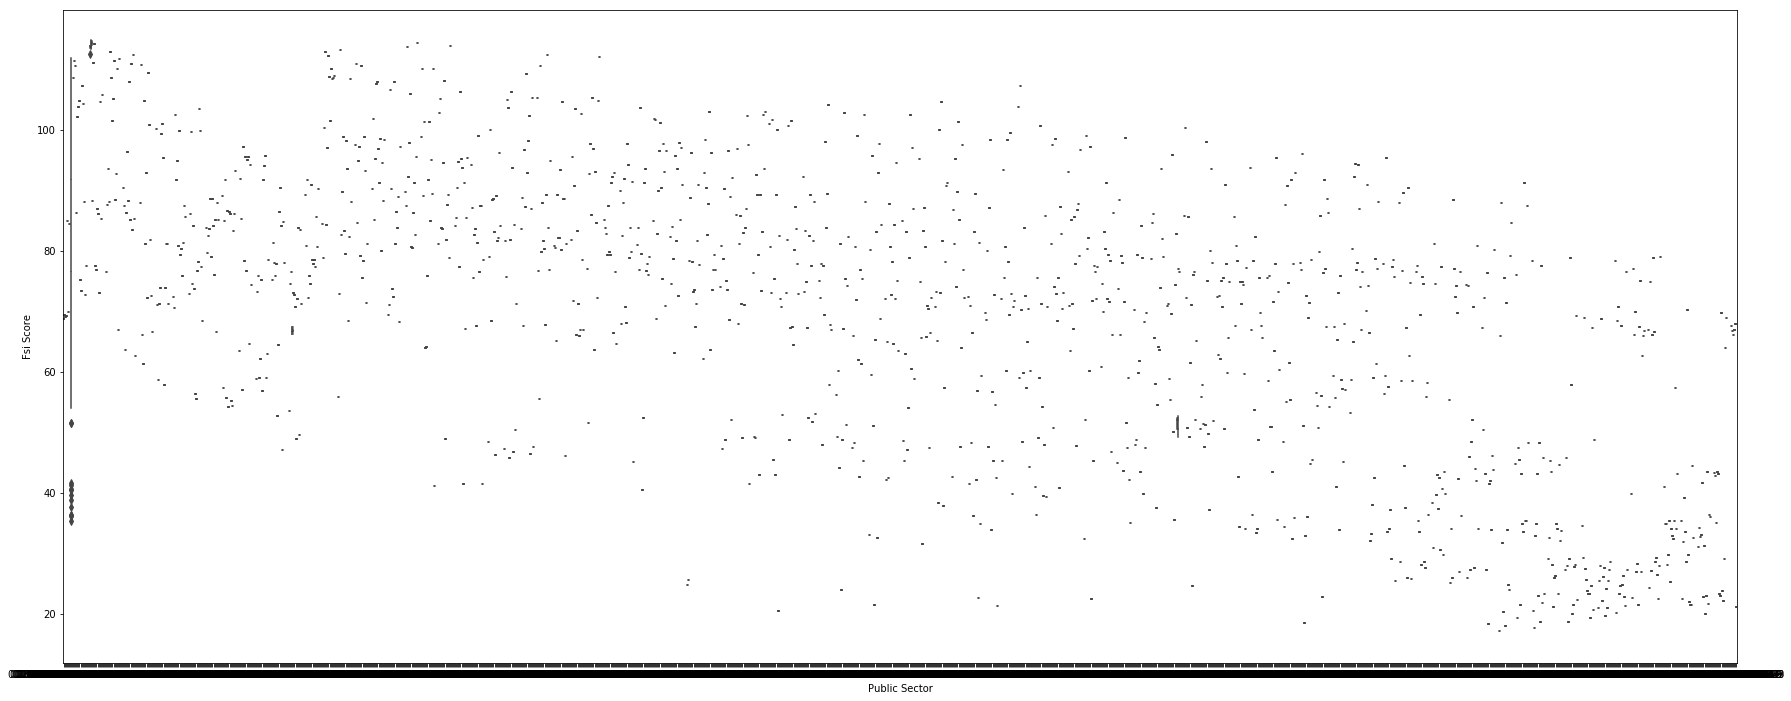

In [31]:
#boxplot
plt.figure(figsize=(30, 12))
sns.boxplot(x=train['Public Sector'], y=train['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

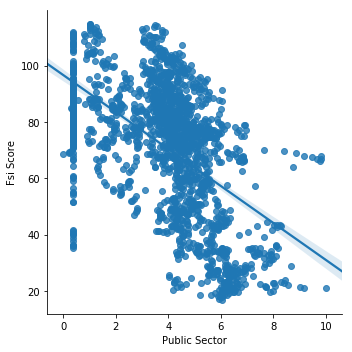

In [32]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Public Sector', y='Fsi Score',data=train)

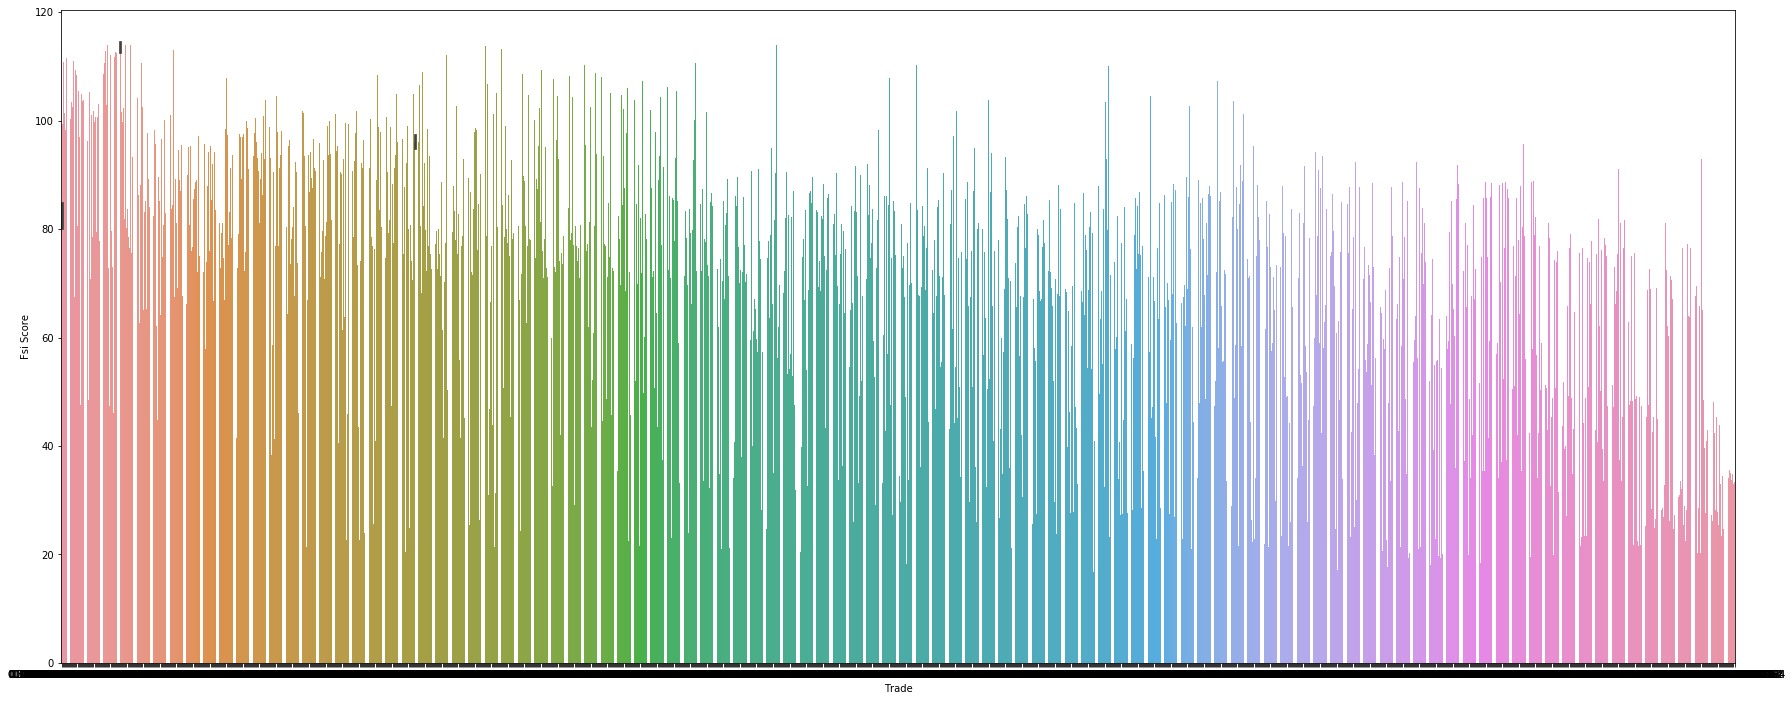

In [33]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(x=train['Trade'], y=train['Fsi Score'])

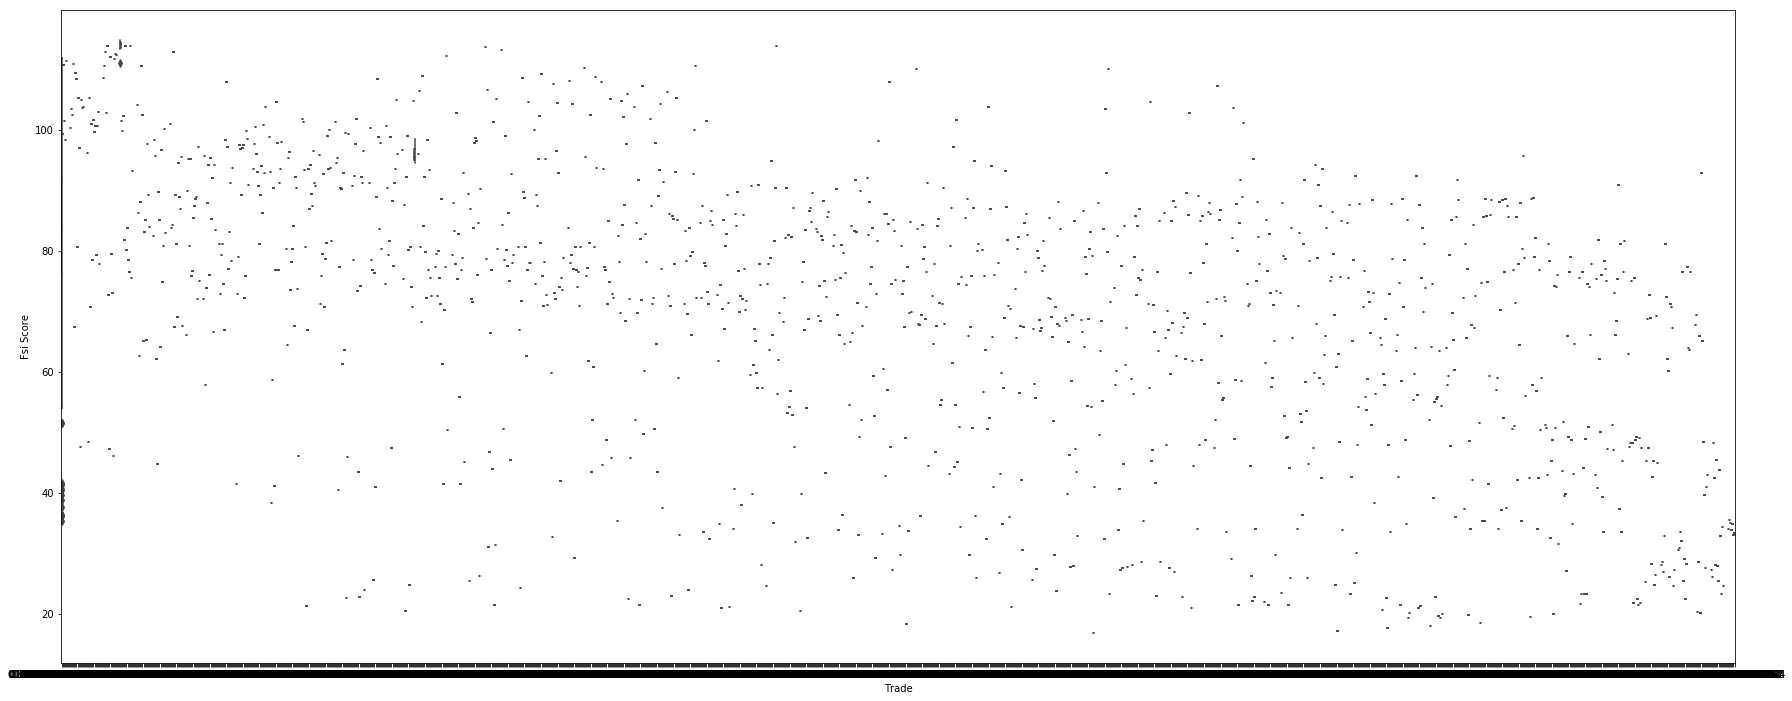

In [34]:
#boxplot
plt.figure(figsize=(30, 12))
sns.boxplot(x=train['Trade'], y=train['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

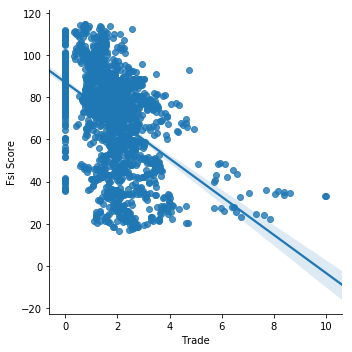

In [35]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Trade', y='Fsi Score',data=train)

<Figure size 2160x864 with 0 Axes>

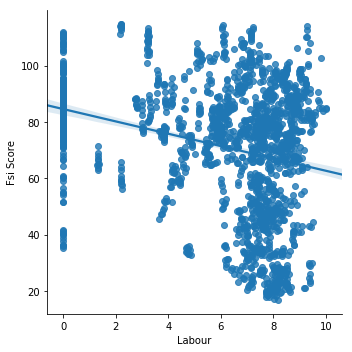

In [136]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Labour',y='Fsi Score',data=train)

In [25]:
print("Find most important features relative to Fsi Score")
corr = temp_corr.corr()
corr.sort_values(['Fsi Score'], ascending=False, inplace=True)
corr['Fsi Score']

Find most important features relative to Fsi Score


Fsi Score            1.000000
Poverty              0.552099
Environment          0.516015
Debt                 0.377199
Private Sector       0.005622
Social Protection    0.004415
Health              -0.038946
Labour              -0.254738
Trade               -0.462139
Public Sector       -0.543575
Infrastructure      -0.617273
Financial Sector    -0.741816
Name: Fsi Score, dtype: float64

# Creating Training and Test set

In [26]:
temp_corr.head()

,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,8.715596,0.891868,5.294118,1.082288,5.784924,0.990978,6.811815,0.516645,0.012523,3.727206,1.742698,1.392047
1,5.474006,1.083986,7.647059,2.604912,9.177459,3.968864,7.862571,1.868172,0.023873,4.671575,5.334303,1.729344
2,6.024465,0.787625,0.000000,2.420803,5.220100,4.598225,4.508491,0.813149,0.080255,2.669509,0.000000,1.460053
3,6.941896,0.568128,5.882353,2.344786,6.007315,4.272841,10.000000,5.574090,0.207461,3.513908,0.019284,2.172513
4,4.984709,0.219890,0.000000,1.722829,5.470378,0.000000,2.212915,0.000000,0.000089,4.784400,0.000000,2.742688


In [27]:
y_train=temp_corr.drop(temp_corr.columns[1:],axis=1).values
y_train

array([[8.71559633],
       [5.47400612],
       [6.02446483],
       ...,
       [9.65341488],
       [7.08460754],
       [8.53211009]])

In [28]:
#x_train=temp_corr.drop(['Fsi Score','Health','Social Protection','Private Sector'],axis=1).values
x_train=temp_corr.drop(['Fsi Score'],axis=1).values
x_train

array([[0.89186772, 5.29411765, 1.08228843, ..., 3.72720601, 1.74269817,
        1.39204671],
       [1.08398635, 7.64705882, 2.60491192, ..., 4.67157544, 5.33430285,
        1.72934427],
       [0.78762518, 0.        , 2.42080307, ..., 2.6695093 , 0.        ,
        1.46005286],
       ...,
       [0.        , 0.        , 0.        , ..., 0.36509462, 0.        ,
        0.        ],
       [0.82980955, 8.23529412, 2.00907882, ..., 3.46340489, 0.72077494,
        1.52927355],
       [2.76778727, 7.05882353, 2.8392852 , ..., 3.95053271, 1.71869343,
        1.03115357]])

In [29]:
test=pd.read_csv('test_normalized.csv')
test.head()

,Country,Year,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Afghanistan,2017,0.049747,5.294118,1.167952,5.941777,1.576530,7.167951,0.652168,0.010017,3.755461,1.542230,1.301583
1,Albania,2017,0.058015,7.647059,3.066268,9.488046,5.741308,8.396930,1.925520,0.058938,5.595872,5.361326,2.129670
2,Algeria,2017,0.020501,0.000000,3.475526,5.414586,5.112042,4.545061,0.838111,0.024326,3.841969,0.000000,1.432198
3,Angola,2017,0.028672,5.620915,2.534827,6.266606,4.149307,9.996682,5.745202,0.298285,3.757822,0.045126,1.292533
4,Antigua and Barbuda,2017,0.013382,0.000000,1.277584,5.611309,0.000000,2.284414,0.000000,0.000410,4.690761,0.000000,3.515973


In [30]:
#x_test=test.drop(['Country','Year','Health','Social Protection','Private Sector'],axis=1).values
x_test=test.drop(['Country','Year'],axis=1).values
x_test

array([[0.04974692, 5.29411765, 1.1679521 , ..., 3.75546124, 1.54223009,
        1.30158343],
       [0.05801483, 7.64705882, 3.06626829, ..., 5.59587195, 5.36132559,
        2.12967019],
       [0.02050083, 0.        , 3.47552631, ..., 3.84196942, 0.        ,
        1.43219796],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05034625, 8.14479638, 2.34629629, ..., 4.23897633, 0.7215875 ,
        1.75313239],
       [0.13551331, 5.6561086 , 3.19794816, ..., 4.04036116, 1.69499711,
        1.96207423]])

In [31]:
result=pd.read_csv('result.csv')

def normalize(df):
    result = df.copy()
    max_value = df['Fsi Score'].max()
    min_value = df['Fsi Score'].min()
    result['Fsi Score'] = ((df['Fsi Score'] - min_value) / (max_value - min_value))*10
    return result

result=normalize(result)
y_test=result.drop(result.columns[0:2],axis=1).values
y_test

array([[ 9.3125    ],
       [ 4.4375    ],
       [ 6.13541667],
       [ 7.625     ],
       [ 3.84375   ],
       [ 3.15625   ],
       [ 5.53125   ],
       [ 0.45833333],
       [ 1.02083333],
       [ 6.08333333],
       [ 3.59375   ],
       [ 4.89583333],
       [ 7.41666667],
       [ 3.30208333],
       [ 5.67708333],
       [ 1.34375   ],
       [ 4.95833333],
       [ 6.21875   ],
       [ 6.05208333],
       [ 6.13541667],
       [ 5.73958333],
       [ 4.78125   ],
       [ 5.23958333],
       [ 4.55208333],
       [ 3.72916667],
       [ 7.30208333],
       [ 8.4375    ],
       [ 7.0625    ],
       [ 8.09375   ],
       [ 0.48958333],
       [ 5.4375    ],
       [ 9.86458333],
       [ 9.53125   ],
       [ 2.41666667],
       [ 5.91666667],
       [ 6.35416667],
       [ 6.96875   ],
       [ 9.59375   ],
       [ 7.86458333],
       [ 2.72916667],
       [ 8.1875    ],
       [ 3.40625   ],
       [ 4.86458333],
       [ 4.65625   ],
       [ 2.3125    ],
       [ 0

# Modal Training

In [32]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [33]:
#Fit the model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
'''
Model Evaluation 
Let's evaluate the model by checking out it's coefficients and how we can interpret them.
'''
# print the intercept
print(model.intercept_)
print(model.coef_)

[6.9457374]
[[ 0.35013311  0.08184232 -0.23311368  0.12120066 -0.17418558 -0.11979841
   0.26900849  0.2082475  -0.1818385   0.05792393 -0.15499914]]


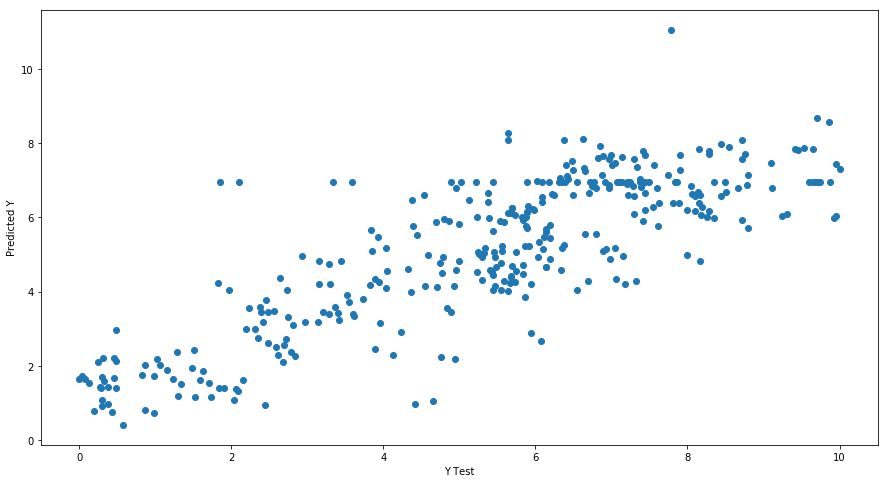

In [35]:
'''
Predictions from our Model 
Let's grab predictions off our test set and see how well it did!
'''
predictions = model.predict(x_test)
predictions= predictions.reshape(-1,1)

plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [36]:
#Prediction
print("Predict value " + str(model.predict([x_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [[3.32074468]]
Real value [2.75]


In [37]:
#Calculating Error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 1.0957575026972473)
('MSE:', 1.9932967218613744)
('RMSE:', 1.4118416065059758)


In [38]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

('Accuracy --> ', 68.34680754163944)


In [39]:
#RMS error

i=0
error=0

while(i<356):
    error+=(model.predict([x_test[i]])-y_test[i])**2
    i+=1
error/=356
error=np.sqrt(error)
print(error)

[[1.41184161]]


In [40]:
#Gradient Boosting Regression 

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)

/home/shubham/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
clf_pred=clf.predict(x_test)
clf_pred= clf_pred.reshape(-1,1)

In [42]:
#Error
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

('MAE:', 0.7216831534255371)
('MSE:', 0.9549634469555516)
('RMSE:', 0.977222311941122)


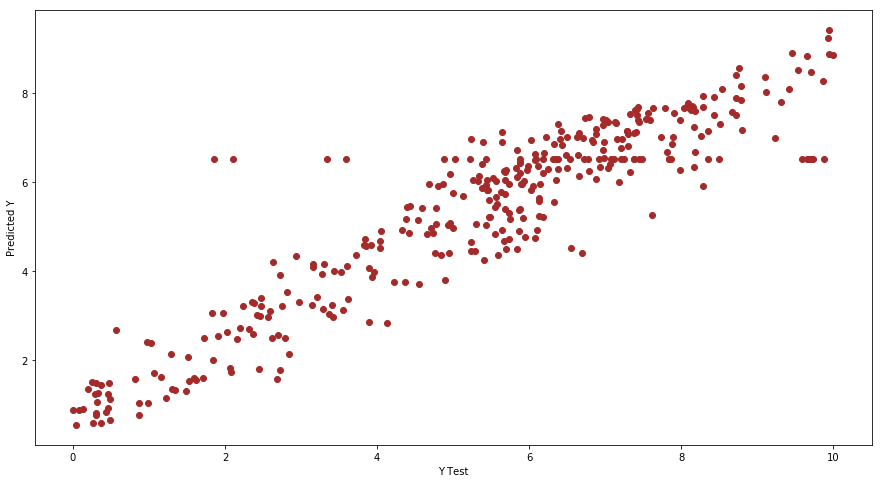

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [44]:
#Score/Accuracy
print("Accuracy --> ", clf.score(x_test, y_test)*100)

('Accuracy --> ', 84.83535268700166)


In [45]:
#Decision Tree Regression 


from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 0)
dtreg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [46]:
dtr_pred = dtreg.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [47]:
#error
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

('MAE:', 0.8371819128039492)
('MSE:', 1.5690814895925864)
('RMSE:', 1.2526298294358897)


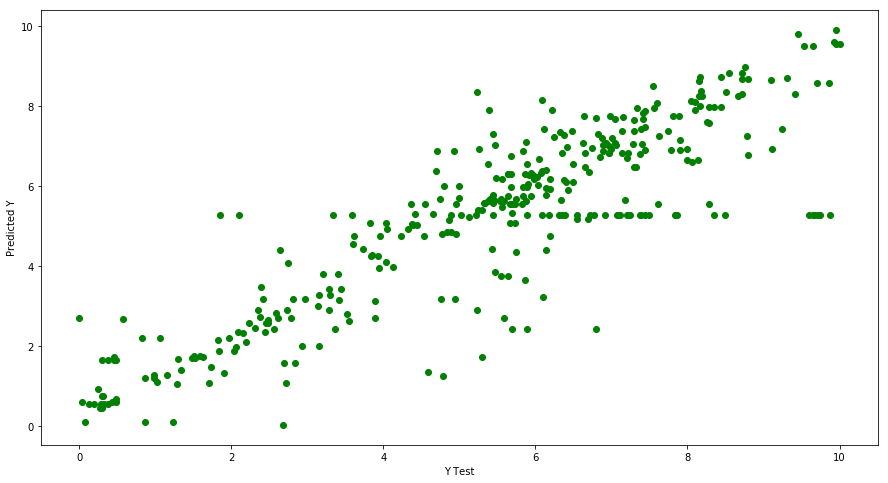

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [49]:
#Score/Accuracy
print("Accuracy --> ", dtreg.score(x_test, y_test)*100)

('Accuracy --> ', 75.08326892418413)


In [50]:
#Support Vector Machine Regression
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

/home/shubham/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)
#error
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

('MAE:', 0.6357703914991326)
('MSE:', 0.8403290317719193)
('RMSE:', 0.9166946229644414)


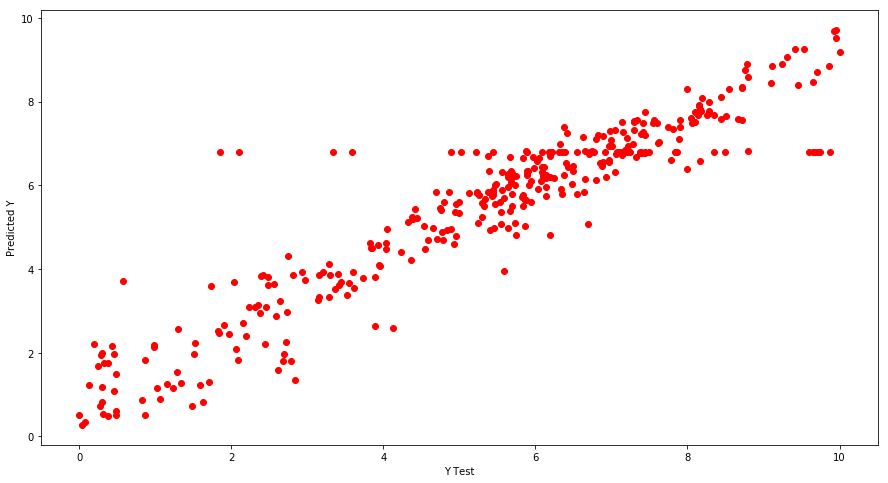

In [52]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [53]:
#Score/Accuracy
print("Accuracy --> ", svr.score(x_test, y_test)*100)

('Accuracy --> ', 86.65572652616132)


In [54]:
#Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50, random_state = 0)
rfr.fit(x_train, y_train)

/home/shubham/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
rfr_pred= rfr.predict(x_test)
rfr_pred = rfr_pred.reshape(-1,1)
#error
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

('MAE:', 0.6907971686033387)
('MSE:', 0.9380032549366417)
('RMSE:', 0.9685056814168111)


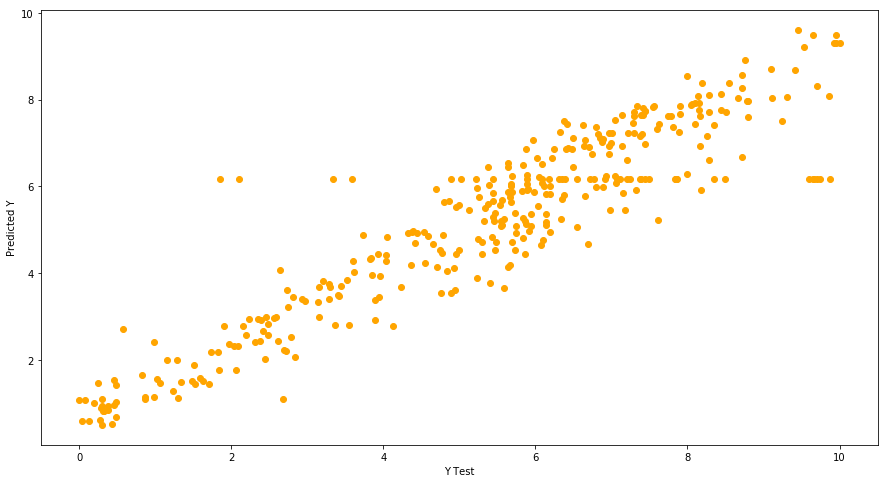

In [56]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [57]:
#Score/Accuracy
print("Accuracy --> ", rfr.score(x_test, y_test)*100)

('Accuracy --> ', 85.10467747754464)


# Modal Comparison

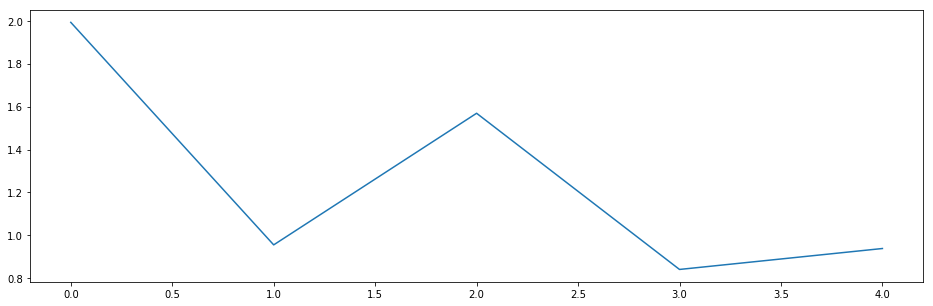

In [58]:
#Modal comparison
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),
                     metrics.mean_squared_error(y_test, clf_pred),
                     metrics.mean_squared_error(y_test, dtr_pred),
                     metrics.mean_squared_error(y_test, svr_pred),
                     metrics.mean_squared_error(y_test, rfr_pred)])

plt.figure(figsize=(16,5))
plt.plot(error_rate)
#Support vector Regression Model is best with MSE 0.8403

In [59]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [60]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

'''
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def cv_rmse(model, X=x_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)
'''

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)
                          )                                
#svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
#svr = SVR(kernel = 'rbf')

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                max_depth=4, max_features='sqrt', min_samples_leaf=15,
                                min_samples_split=10, loss='huber', random_state =42) 

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)


stack_gen = StackingCVRegressor(regressors=(svr, clf, rfr, xgboost, lightgbm),
                                meta_regressor=svr,
                                use_features_in_secondary=True)

# training base models

In [61]:
#training
ridge.fit(x_train,y_train)

#predicting
ridge_pred= ridge.predict(x_test)
ridge_pred = ridge_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

#Score/Accuracy
print("Accuracy --> ", ridge.score(x_test, y_test)*100)

('MAE:', 1.0976291393485724)
('MSE:', 1.9993875564609378)
('RMSE:', 1.41399701430411)
('Accuracy --> ', 68.25008618666124)


In [62]:
#training
lasso.fit(x_train,y_train)

#predicting
lasso_pred= lasso.predict(x_test)
lasso_pred = lasso_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

#Score/Accuracy
print("Accuracy --> ", lasso.score(x_test, y_test)*100)

('MAE:', 1.095748992124903)
('MSE:', 1.9935861267393102)
('RMSE:', 1.4119440947641342)
('Accuracy --> ', 68.34221184437106)


/home/shubham/.local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
#training
elasticnet.fit(x_train,y_train)

#predicting
elasticnet_pred= elasticnet.predict(x_test)
elasticnet_pred = elasticnet_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, elasticnet_pred))
print('MSE:', metrics.mean_squared_error(y_test, elasticnet_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elasticnet_pred)))

#Score/Accuracy
print("Accuracy --> ", elasticnet.score(x_test, y_test)*100)

('MAE:', 1.0957808658778132)
('MSE:', 1.9935839103697126)
('RMSE:', 1.411943309899414)
('Accuracy --> ', 68.34224703992057)


In [64]:
#training
svr.fit(x_train,y_train)

#predicting
svr_pred= svr.predict(x_test)
svr_pred = svr_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

#Score/Accuracy
print("Accuracy --> ", svr.score(x_test, y_test)*100)

('MAE:', 0.6357703914991326)
('MSE:', 0.8403290317719193)
('RMSE:', 0.9166946229644414)
('Accuracy --> ', 86.65572652616132)


In [65]:
#training
gbr.fit(x_train,y_train)

#predicting
gbr_pred= gbr.predict(x_test)
gbr_pred = gbr_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)))

#Score/Accuracy
print("Accuracy --> ", gbr.score(x_test, y_test)*100)

('MAE:', 0.7293978065605369)
('MSE:', 0.9926296197132767)
('RMSE:', 0.9963079944039778)
('Accuracy --> ', 84.23722065658485)


In [66]:
#training
clf.fit(x_train,y_train)

#predicting
clf_pred= clf.predict(x_test)
clf_pred = clf_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

#Score/Accuracy
print("Accuracy --> ", clf.score(x_test, y_test)*100)

('MAE:', 0.721969176843102)
('MSE:', 0.9563767306199487)
('RMSE:', 0.9779451572659628)
('Accuracy --> ', 84.81290999729231)


In [67]:
#training
lightgbm.fit(x_train,y_train)

#predicting
lightgbm_pred= lightgbm.predict(x_test)
lightgbm_pred = lightgbm_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, lightgbm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lightgbm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lightgbm_pred)))

#Score/Accuracy
print("Accuracy --> ", lightgbm.score(x_test, y_test)*100)

('MAE:', 0.7929646529187125)
('MSE:', 1.1035904078053742)
('RMSE:', 1.050519113488838)
('Accuracy --> ', 82.47518335311167)


In [68]:
#training
xgboost.fit(x_train,y_train)

#predicting
xgboost_pred= xgboost.predict(x_test)
xgboost_pred = xgboost_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, xgboost_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgboost_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgboost_pred)))

#Score/Accuracy
print("Accuracy --> ", xgboost.score(x_test, y_test)*100)

('MAE:', 0.7128362941942857)
('MSE:', 0.9528988812643372)
('RMSE:', 0.9761653964694391)
('Accuracy --> ', 84.86813761784022)


In [69]:
#training
stack_gen.fit(x_train,y_train)

#predicting
stack_gen_pred= stack_gen.predict(x_test)
stack_gen_pred = stack_gen_pred.reshape(-1,1)

#error
print('MAE:', metrics.mean_absolute_error(y_test, stack_gen_pred))
print('MSE:', metrics.mean_squared_error(y_test, stack_gen_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, stack_gen_pred)))

#Score/Accuracy
print("Accuracy --> ", stack_gen.score(x_test, y_test)*100)

('MAE:', 0.623400761717739)
('MSE:', 0.8468503379410202)
('RMSE:', 0.9202447163342043)
('Accuracy --> ', 86.55216936029306)


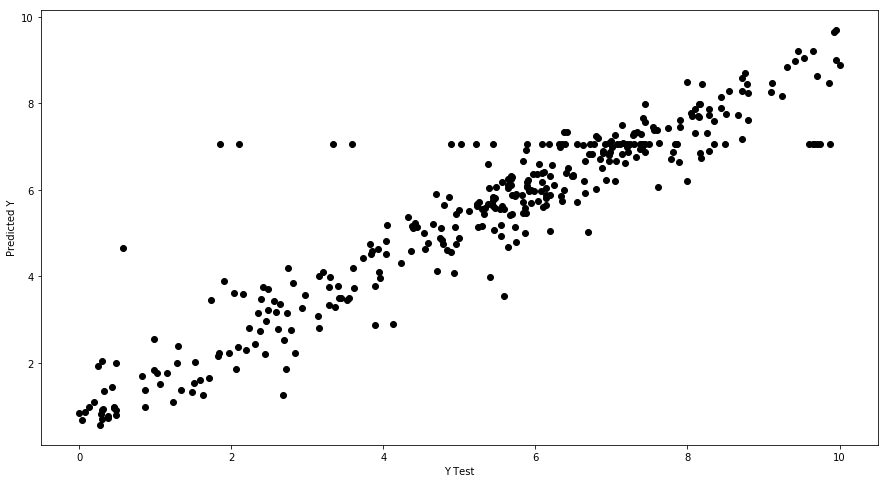

In [70]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,stack_gen_pred, c='Black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Model Comparision

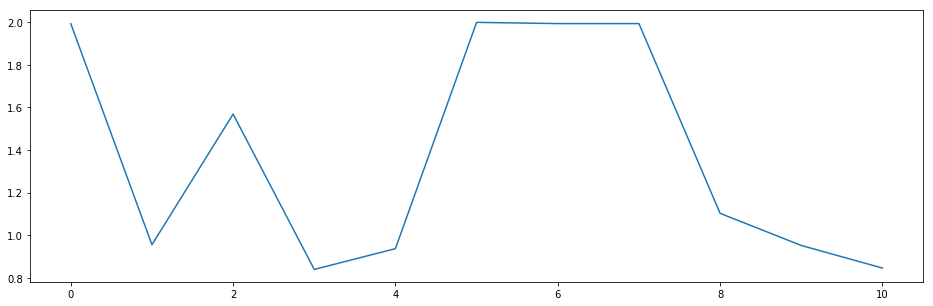

In [71]:
#Model comparison
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),
                     metrics.mean_squared_error(y_test, clf_pred),
                     metrics.mean_squared_error(y_test, dtr_pred),
                     metrics.mean_squared_error(y_test, svr_pred),
                     metrics.mean_squared_error(y_test, rfr_pred),
                     metrics.mean_squared_error(y_test, ridge_pred),
                     metrics.mean_squared_error(y_test, lasso_pred),
                     metrics.mean_squared_error(y_test, elasticnet_pred),
                     metrics.mean_squared_error(y_test, lightgbm_pred),
                     metrics.mean_squared_error(y_test, xgboost_pred),
                     metrics.mean_squared_error(y_test, stack_gen_pred)])

plt.figure(figsize=(16,5))
plt.plot(error_rate)
#stacked regression Model is best with MSE 0.8230